<a href="https://colab.research.google.com/github/iamkumarniraj/DeepLearning-Models/blob/main/LRwithDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np  # Importing the NumPy library and renaming it to "np"
import pandas as pd  # Importing the Pandas library and renaming it to "pd"
import matplotlib.pyplot as plt  # Importing the Pyplot module from the Matplotlib library and renaming it to "plt"
import seaborn as sns  # Importing the Seaborn library and renaming it to "sns"
%matplotlib inline  

In [2]:
data = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
data.drop(columns=['area_type', 'availability', 'society'], axis=1, inplace=True)

In [6]:
data.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [7]:
data.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [8]:
data.drop(['balcony'], axis=1, inplace=True)

In [9]:
data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [10]:
data['location'] = data['location'].fillna(data['location'].mode().iloc[0])

In [11]:
data['size'] = data['size'].fillna(data['size'].mode().iloc[0])

In [12]:
data.isnull().sum()

location       0
size           0
total_sqft     0
bath          73
price          0
dtype: int64

In [13]:
data['bath'] = data['bath'].fillna(data['bath'].mode().iloc[0])

In [14]:
data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


<Axes: >

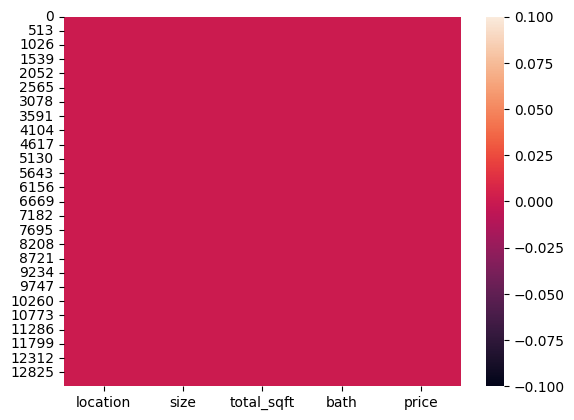

In [15]:
sns.heatmap(data.isnull())

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [17]:
data['bhk'] = pd.to_numeric(data['size'].str.extract('(\d+)')[0])

In [18]:
# convert object-type column to float-type
data['total_sqft'] = pd.to_numeric(data['total_sqft'], errors='coerce')

In [19]:
data['total_sqft'].unique()

array([1056., 2600., 1440., ..., 2758.,  774., 4689.])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13073 non-null  float64
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
 5   bhk         13320 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 624.5+ KB


In [21]:
data.isnull().sum()/data.shape[0]

location      0.000000
size          0.000000
total_sqft    0.018544
bath          0.000000
price         0.000000
bhk           0.000000
dtype: float64

In [22]:
df = data.drop(['size'],axis=1)

In [23]:
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [24]:
df.describe()

,total_sqft,bath,price,bhk
count,13073.000000,13320.000000,13320.000000,13320.000000
mean,1554.942029,2.688814,112.565627,2.802778
std,1238.458773,1.338754,148.971674,1.294496
min,1.000000,1.000000,8.000000,1.000000
25%,1100.000000,2.000000,50.000000,2.000000
50%,1275.000000,2.000000,72.000000,3.000000
75%,1670.000000,3.000000,120.000000,3.000000
max,52272.000000,40.000000,3600.000000,43.000000


In [25]:
df['total_sqft'].isnull().sum()

247

In [26]:
df['total_sqft'] = df['total_sqft'].fillna(df['total_sqft'].mean())

In [27]:
df['total_sqft'].isnull().sum()

0

In [28]:
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [29]:
df['location'] = df['location'].str.replace(' ', '')

In [30]:
print(df['location'])

0        ElectronicCityPhaseII
1              ChikkaTirupathi
2                  Uttarahalli
3           Lingadheeranahalli
4                     Kothanur
                 ...          
13315               Whitefield
13316             RichardsTown
13317      RajaRajeshwariNagar
13318          Padmanabhanagar
13319             Doddathoguru
Name: location, Length: 13320, dtype: object


In [31]:
location_counting = df['location'].value_counts()

In [32]:
location_counting

Whitefield                         542
SarjapurRoad                       399
ElectronicCity                     304
KanakpuraRoad                      273
Thanisandra                        237
                                  ... 
1Channasandra                        1
Hosahalli                            1
nearRamanashreeCaliforniaresort      1
Vijayabankbanklayout                 1
AbshotLayout                         1
Name: location, Length: 1292, dtype: int64

In [40]:
# filter the results to count only the values that occur less than 20 times
location_counting_less_than_20 = location_counting[location_counting <= 20]

In [41]:
location_counting_less_than_20

Yelachenahalli                     20
PoornaPragnaLayout                 20
Sanjaynagar                        20
HBRLayout                          20
HRBRLayout                         19
                                   ..
1Channasandra                       1
Hosahalli                           1
nearRamanashreeCaliforniaresort     1
Vijayabankbanklayout                1
AbshotLayout                        1
Name: location, Length: 1148, dtype: int64

In [42]:
# replace the values in the 'location' column with 'Others' for locations that occur less than 20 times
df['location'] = df['location'].apply(lambda x: x if x in location_counting_less_than_20.index else 'Others')


In [43]:
print(df['location'])

0              Others
1              Others
2              Others
3              Others
4              Others
             ...     
13315          Others
13316    RichardsTown
13317          Others
13318          Others
13319          Others
Name: location, Length: 13320, dtype: object


In [44]:
df['location'].value_counts()

Others                        9749
NGRLayout                       14
SarakkiNagar                    14
1stBlockJayanagar               14
GiriNagar                       14
                              ... 
Vasantapuramainroad              1
BapujiLayout                     1
1stStageRadhaKrishnaLayout       1
BEMLLayout5thstage               1
AbshotLayout                     1
Name: location, Length: 1107, dtype: int64

In [57]:
df.head(5)

,location,total_sqft,bath,price,bhk
0,Others,1056.0,2.0,39.07,2
1,Others,2600.0,5.0,120.00,4
2,Others,1440.0,2.0,62.00,3
3,Others,1521.0,3.0,95.00,3
4,Others,1200.0,2.0,51.00,2


In [59]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [60]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('price', axis=1), df['price'], test_size=0.2, random_state=42)


In [61]:
# Define the preprocessing steps for each type of column
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [65]:
# Define the column transformer to apply the appropriate preprocessing step to each column
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['total_sqft', 'bath', 'bhk']),
        ('cat', categorical_transformer, ['location'])
    ])

In [66]:
# Define the neural network model
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mae'])

In [67]:
# Define the pipeline to apply the preprocessing and model training steps
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

In [68]:
pipeline.fit(X_train, y_train, model__epochs=50)

Epoch 1/50


ValueError: ignored

In [ ]:
# Evaluate the pipeline on the testing set
score = pipeline.score(X_test, y_test)
print('MSE:', score)

In [70]:
# create instance of OneHotEncoder
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

# fit and transform location column
location_encoded = onehot_encoder.fit_transform(df[['location']])

# convert location_encoded to a numpy array
location_encoded = location_encoded.toarray()

# concatenate location_encoded with other features
X = np.concatenate((location_encoded, df.drop('location', axis=1).values), axis=1)
y = df['price'].values

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
import tensorflow.keras as keras

# create a Sequential model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(1)
])

In [73]:
# compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [80]:
# fit the model with the training data
model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)

Epoch 1/50
267/267 [==============================] - 3s 11ms/step - loss: 4.1755 - mae: 0.8847 - val_loss: 1.0940 - val_mae: 0.7924
Epoch 2/50
267/267 [==============================] - 3s 10ms/step - loss: 9.5125 - mae: 1.2836 - val_loss: 0.7653 - val_mae: 0.5098
Epoch 3/50
267/267 [==============================] - 1s 5ms/step - loss: 0.8202 - mae: 0.4109 - val_loss: 0.0202 - val_mae: 0.0555
Epoch 4/50
267/267 [==============================] - 1s 4ms/step - loss: 42.9691 - mae: 2.7621 - val_loss: 0.6693 - val_mae: 0.3021
Epoch 5/50
267/267 [==============================] - 1s 4ms/step - loss: 0.4776 - mae: 0.3661 - val_loss: 0.1689 - val_mae: 0.3533
Epoch 6/50
267/267 [==============================] - 1s 4ms/step - loss: 0.1604 - mae: 0.2346 - val_loss: 0.0320 - val_mae: 0.0704
Epoch 7/50
267/267 [==============================] - 1s 4ms/step - loss: 0.3061 - mae: 0.1861 - val_loss: 1.9039 - val_mae: 0.9502
Epoch 8/50
267/267 [==============================] - 1s 4ms/step - loss:

In [77]:
print(history)

In [81]:
# evaluate the model on the test data
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)

84/84 [==============================] - 0s 2ms/step - loss: 0.1252 - mae: 0.1560


In [82]:
from sklearn.metrics import r2_score
# calculate R2 score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

84/84 [==============================] - 0s 3ms/step
R2 score: 0.9999941201590601
